In [3]:
import torch
x = torch.arange(4.0)
x.norm(p=torch.inf)

tensor(3.)

In [30]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.tensor(-2.1, requires_grad=True)
d = f(a)
d.backward()
a.grad

tensor(51200.)

In [5]:
a.grad == d / a


tensor(True)

In [13]:
b = torch.randn(0, requires_grad=True)




In [15]:
a.dim(), b.dim()



(0, 1)

In [16]:
d.backward()


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [17]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn((3), requires_grad=True)

In [23]:
d = a**2
d.sum().backward()

In [24]:
a.grad

tensor([ 0.5251, -0.4909, -0.4447])

In [19]:
d
#d.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [20]:
d = f(a)
#d.backward()
torch.ones_like(d)

tensor([1., 1., 1.])

In [27]:
a.grad
d / a

tensor(2048., grad_fn=<DivBackward0>)

In [31]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [49]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.(dim=1, keepdims=True)



In [48]:
estimates
cum_counts

tensor([[  1.,   2.,   2.,   3.,   2.,   0.],
        [  4.,   2.,   3.,   6.,   4.,   1.],
        [  7.,   4.,   3.,   6.,   8.,   2.],
        ...,
        [832., 873., 762., 862., 810., 841.],
        [833., 875., 763., 864., 813., 842.],
        [837., 875., 765., 865., 813., 845.]])

tensor([[1.0000, 0.5000, 0.5000, 0.4286, 0.1250, 0.2000],
        [1.0000, 0.3333, 0.4000, 0.3333, 0.1176, 0.1500],
        [1.0000, 0.5000, 0.2941, 0.2273, 0.1200, 0.1667],
        ...,
        [1.0000, 0.4967, 0.3311, 0.2460, 0.1965, 0.1701],
        [1.0000, 0.4967, 0.3308, 0.2456, 0.1968, 0.1701],
        [1.0000, 0.4964, 0.3304, 0.2463, 0.1967, 0.1702]])

In [54]:
cum_counts.sum(dim=1, keepdims=True)
cum_counts.cumsum(dim=1)

tensor([[1.0000e+00, 2.0000e+00, 4.0000e+00, 7.0000e+00, 8.0000e+00, 1.0000e+01],
        [4.0000e+00, 6.0000e+00, 1.0000e+01, 1.5000e+01, 1.7000e+01, 2.0000e+01],
        [6.0000e+00, 1.2000e+01, 1.7000e+01, 2.2000e+01, 2.5000e+01, 3.0000e+01],
        ...,
        [8.4300e+02, 1.6750e+03, 2.5040e+03, 3.3210e+03, 4.1330e+03, 4.9800e+03],
        [8.4500e+02, 1.6790e+03, 2.5090e+03, 3.3260e+03, 4.1410e+03, 4.9900e+03],
        [8.4700e+02, 1.6820e+03, 2.5120e+03, 3.3330e+03, 4.1490e+03, 5.0000e+03]])

In [ ]:
a = estimates[:, 2].numpy()

NameError: name 'estimates' is not defined

In [4]:
0.01*0.9985/(0.011485)

0.8693948628646061

In [22]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l



In [20]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)


In [23]:
def synthetic_data(w, b, num_examples): #@save
    """⽣成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [24]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 10000)


In [14]:
X = torch.normal(0, 1, (10000,2))


In [16]:
y = torch.matmul(X, true_w)


In [18]:
z = y.reshape((-1, 1))

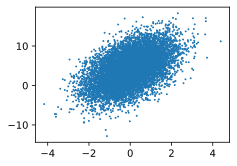

In [27]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(),
labels.detach().numpy(), 1);


In [28]:
import random

In [29]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
        batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]


In [30]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3920,  0.8971],
        [-1.9594, -0.8675],
        [-0.2590, -1.1624],
        [-0.1053, -1.0213],
        [-0.3014,  1.2389],
        [ 1.2035, -0.4582],
        [ 0.2572, -0.2955],
        [ 0.8852, -1.0153],
        [-0.2845, -0.2177],
        [-1.2496, -0.6714]]) 
 tensor([[ 0.3702],
        [ 3.2264],
        [ 7.6327],
        [ 7.4725],
        [-0.6082],
        [ 8.1682],
        [ 5.7279],
        [ 9.4291],
        [ 4.3622],
        [ 3.9990]])


In [31]:
len(features)


10000